In [33]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [34]:
data = pd.read_csv("../data/data.csv")


# NUM_CLUSTERS = 10
# data['binary_order'] = (data['track_number']-1)%NUM_CLUSTERS # average number of tracks / album

# labels = data['binary_order']
# data['labels'] = data['track_number']/data['total_tracks']
labels = data['track_number']/data['total_tracks']

columns_to_remove = ['Unnamed: 0',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'key',
                    'mode',
                    'duration_ms',
                    'time_signature']
                  
data.drop(columns = columns_to_remove, axis = 1, inplace = True)

        # Train on:
        # Danceability, Energy, Loudness, Speechiness, Acousticness, 
        # Instrumentalness, Liveness, Valence, Tempo, 

        # Labels:
        # Track Number/Total Albums
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.788,0.616,-10.671,0.0337,0.00286,0.549000,0.0952,0.6960,119.037
1,0.712,0.500,-11.948,0.0338,0.82500,0.314000,0.1060,0.6820,90.039
2,0.740,0.682,-10.420,0.0504,0.06920,0.530000,0.3810,0.4100,113.201
3,0.702,0.297,-14.116,0.0317,0.89400,0.485000,0.1030,0.0676,110.116
4,0.775,0.585,-9.516,0.0271,0.04220,0.619000,0.0770,0.5180,109.942
...,...,...,...,...,...,...,...,...,...
4955,0.530,0.275,-13.868,0.0349,0.46000,0.000011,0.0729,0.0698,133.973
4956,0.490,0.495,-12.252,0.0338,0.17300,0.000000,0.0794,0.2300,148.967
4957,0.767,0.355,-10.031,0.0445,0.14600,0.000000,0.2980,0.2880,119.992
4958,0.743,0.379,-13.629,0.0784,0.20700,0.196000,0.1110,0.1830,127.030


In [35]:
data.dropna(inplace = True)
df = data

<AxesSubplot:>

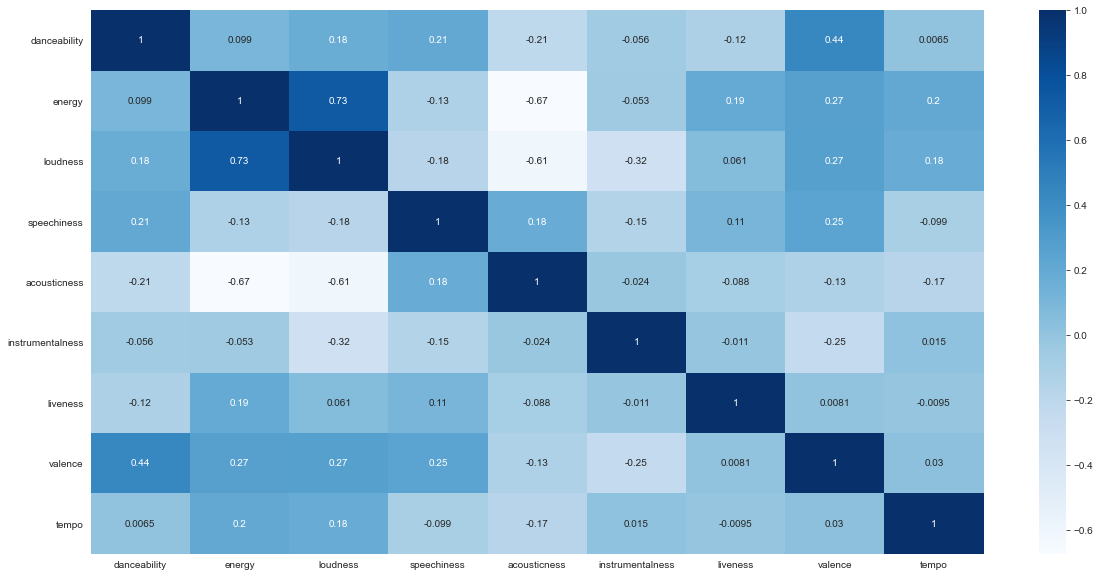

In [36]:
sb.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [37]:

# FEATURE SELECTION & DATA SPLIT
# from sklearn import preprocessing


# x1 = data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled1 = min_max_scaler.fit_transform(x1)
# data = pd.DataFrame(x_scaled1)

# x2 = labels.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled2 = min_max_scaler.fit_transform(x2)
# labels = pd.DataFrame(x_scaled2)


X_var = data.values
y_var = labels.values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[ 6.24000e-01  7.57000e-01 -2.94000e+00  2.96000e-02  2.65000e-03
   1.87000e-06  1.89000e-01  6.58000e-01  1.21070e+02]
 [ 6.55000e-01  7.17000e-01 -6.85000e+00  3.28000e-01  5.72000e-01
   0.00000e+00  3.66000e-01  8.53000e-01  8.78490e+01]
 [ 3.91000e-01  2.85000e-01 -1.41770e+01  3.82000e-02  9.53000e-01
   4.60000e-04  1.10000e-01  1.09000e-01  1.49792e+02]
 [ 6.99000e-01  5.54000e-01 -1.05460e+01  1.08000e-01  6.07000e-02
   8.18000e-01  1.30000e-01  5.73000e-01  1.64847e+02]
 [ 1.46000e-01  2.16000e-01 -1.23020e+01  3.99000e-02  9.39000e-01
   5.40000e-01  7.73000e-02  3.41000e-02  7.80450e+01]]
X_test samples :  [[ 6.81000e-01  6.13000e-01 -1.00360e+01  4.91000e-02  7.16000e-04
   2.98000e-01  1.13000e-01  1.26000e-01  1.25979e+02]
 [ 6.48000e-01  7.85000e-01 -5.41400e+00  1.65000e-01  5.61000e-02
   0.00000e+00  1.48000e-01  9.43000e-01  1.60020e+02]
 [ 6.01000e-01  4.06000e-01 -1.18270e+01  2.75000e-02  6.22000e-01
   9.19000e-05  1.33000e-01  2.32000e-01 

In [38]:
# MODELING
import pickle
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.linear_model import LogisticRegression # ElasticNet algorithm
from sklearn import svm

# 1. OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)
pickle.dump(ols, open('ols.sav', 'wb'))

# 2. Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)
pickle.dump(ridge, open('ridge.sav', 'wb'))

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)
pickle.dump(lasso, open('lasso.sav', 'wb'))

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)
pickle.dump(bayesian, open('bayesian.sav', 'wb'))

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)
pickle.dump(en, open('en.sav', 'wb'))


# # 6. Logistic reg
# LogRegression = LogisticRegression()
# LogRegression.fit(X_train, y_train)
# LogRegression_yhat = LogRegression.predict(X_test)
# pickle.dump(LogRegression, open('LogRegression.sav', 'wb'))


# 7. SVM
regr = svm.SVR()
regr.fit(X_train, y_train)
regr_yhat = regr.predict(X_test)
pickle.dump(regr, open('regr.sav', 'wb'))

In [39]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.004238470562743624
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.004268010027595137
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.005000236045494488
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.006886702027438019
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.005299126301687496
-------------------------------------------------------------------------------


In [40]:

# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.00169615235138032
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.0017275237403528987
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.0027603914261297158
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.004530809512679146
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.0030569092816679078
-------------------------------------------------------------------------------
